In [34]:
import numpy as np
import pandas as pd
import scipy
from datetime import datetime
import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline

In [35]:
# Download AAPL stock data
import yfinance as yf
ticker = 'AAPL'
aapl_data = yf.download(ticker, start='2017-01-01', end='2025-01-01')
# Remove `NA` values
aapl_data.dropna(inplace=True)

[*********************100%***********************]  1 of 1 completed


In [36]:
aapl_data.head()

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,,
2017-01-03,26.891964,29.037500,29.082500,28.690001,28.950001,115127600
2017-01-04,26.861856,29.004999,29.127501,28.937500,28.962500,84472400
2017-01-05,26.998461,29.152500,29.215000,28.952499,28.980000,88774400
2017-01-06,27.299450,29.477501,29.540001,29.117500,29.195000,127007600
2017-01-09,27.549498,29.747499,29.857500,29.485001,29.487499,134247600


In [37]:
# Remove `NA` values
aapl_data.dropna(inplace=True)

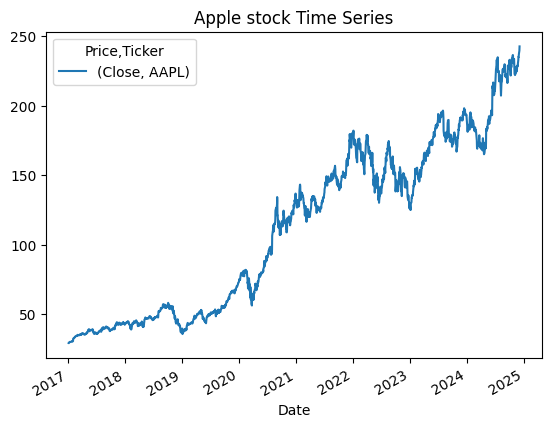

In [38]:
aapl_data[['Close']].plot()
plt.title('Apple stock Time Series')
plt.show()

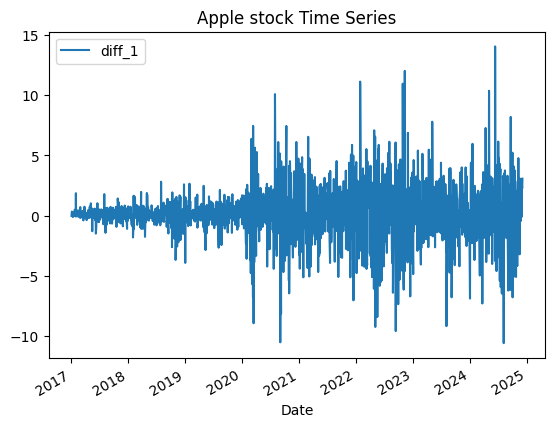

In [39]:
aapl_data['diff_1'] = aapl_data.Close - aapl_data.Close.shift()
aapl_data.plot(y='diff_1')
plt.title('Apple stock Time Series')
plt.show()

### ACF and PACF
  Plot the ACF and PACF to identify the most significant patterns in the differences, which can then guide the selection and evaluation of the ARIMA model.
* Use the ACF to identify the Moving Average (MA) order (q) of the model.
* Use the PACF to identify the AutoRegressive (AR) order (p)

Text(0.5, 1.0, 'AAPL PACF')

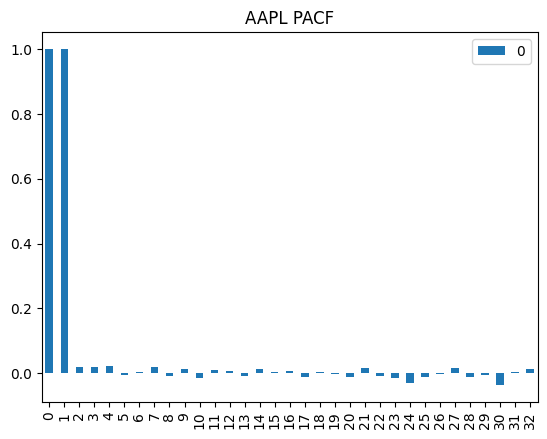

In [40]:
from statsmodels.tsa.stattools import pacf,acf
x_acf = pd.DataFrame(pacf(aapl_data.Close))
x_acf.plot(kind='bar')
plt.title("AAPL PACF")

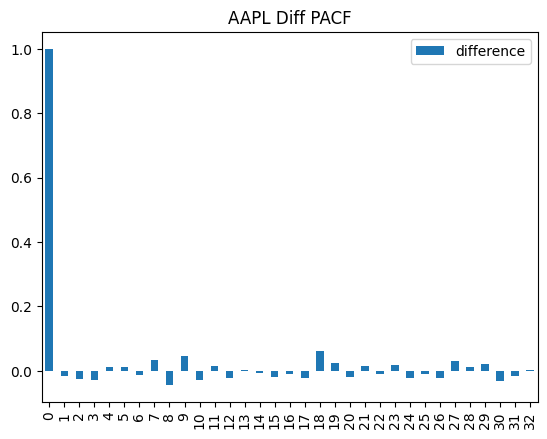

In [41]:
x_acf = pd.DataFrame(pacf(aapl_data.diff_1[1:]))
x_acf.plot(kind='bar')
plt.title("AAPL Diff PACF")
plt.legend(['difference'])

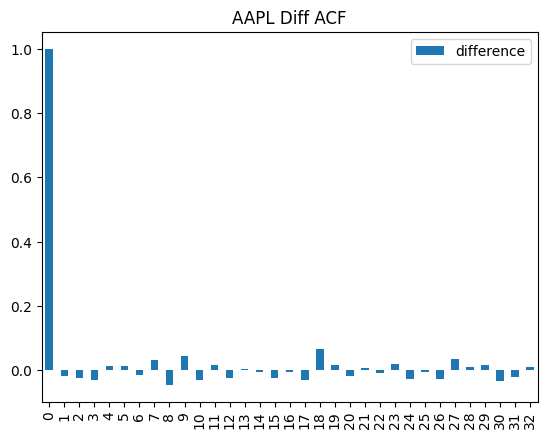

In [42]:
x_acf = pd.DataFrame(acf(aapl_data.diff_1[1:]))
x_acf.plot(kind='bar')
plt.title("AAPL Diff ACF")
plt.legend(['difference'])

ACF and PACF are strongest at 3, so I will be modelling with 3 for p and q

In [43]:

import warnings
warnings.filterwarnings("ignore")
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(aapl_data.Close, order=(3,1,3))
model_fit = model.fit()
print(model_fit.summary())
print('Residuals Description')
print(model_fit.resid.describe())

                               SARIMAX Results                                
Dep. Variable:                   AAPL   No. Observations:                 1993
Model:                 ARIMA(3, 1, 3)   Log Likelihood               -4375.558
Date:                Tue, 03 Dec 2024   AIC                           8765.116
Time:                        15:30:11   BIC                           8804.294
Sample:                             0   HQIC                          8779.504
                               - 1993                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1878      0.522     -0.360      0.719      -1.210       0.835
ar.L2         -0.2573      0.497     -0.518      0.605      -1.231       0.717
ar.L3         -0.1080      0.492     -0.220      0.8

In [44]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(aapl_data.Close, order=(3,2,3))
model_fit = model.fit()
print(model_fit.summary())
print('Residuals Description')
print(model_fit.resid.describe())

                               SARIMAX Results                                
Dep. Variable:                   AAPL   No. Observations:                 1993
Model:                 ARIMA(3, 2, 3)   Log Likelihood               -4368.806
Date:                Tue, 03 Dec 2024   AIC                           8751.613
Time:                        15:30:24   BIC                           8790.788
Sample:                             0   HQIC                          8766.000
                               - 1993                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.7676      0.016   -108.899      0.000      -1.799      -1.736
ar.L2         -1.0031      0.029    -35.021      0.000      -1.059      -0.947
ar.L3         -0.0080      0.016     -0.501      0.6

### summary
   the model with 3,1,3 looks good and the p values are better. so I can select the first configuration for the model.